In [24]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [25]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
web_page=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget',headers=headers).text

In [26]:
soup=BeautifulSoup(web_page,'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   List of companies - 782.9k companies | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/>
  <meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/>
  <meta content="#ffffff" data-n-head="ssr" name="theme-color"/>
  <meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/
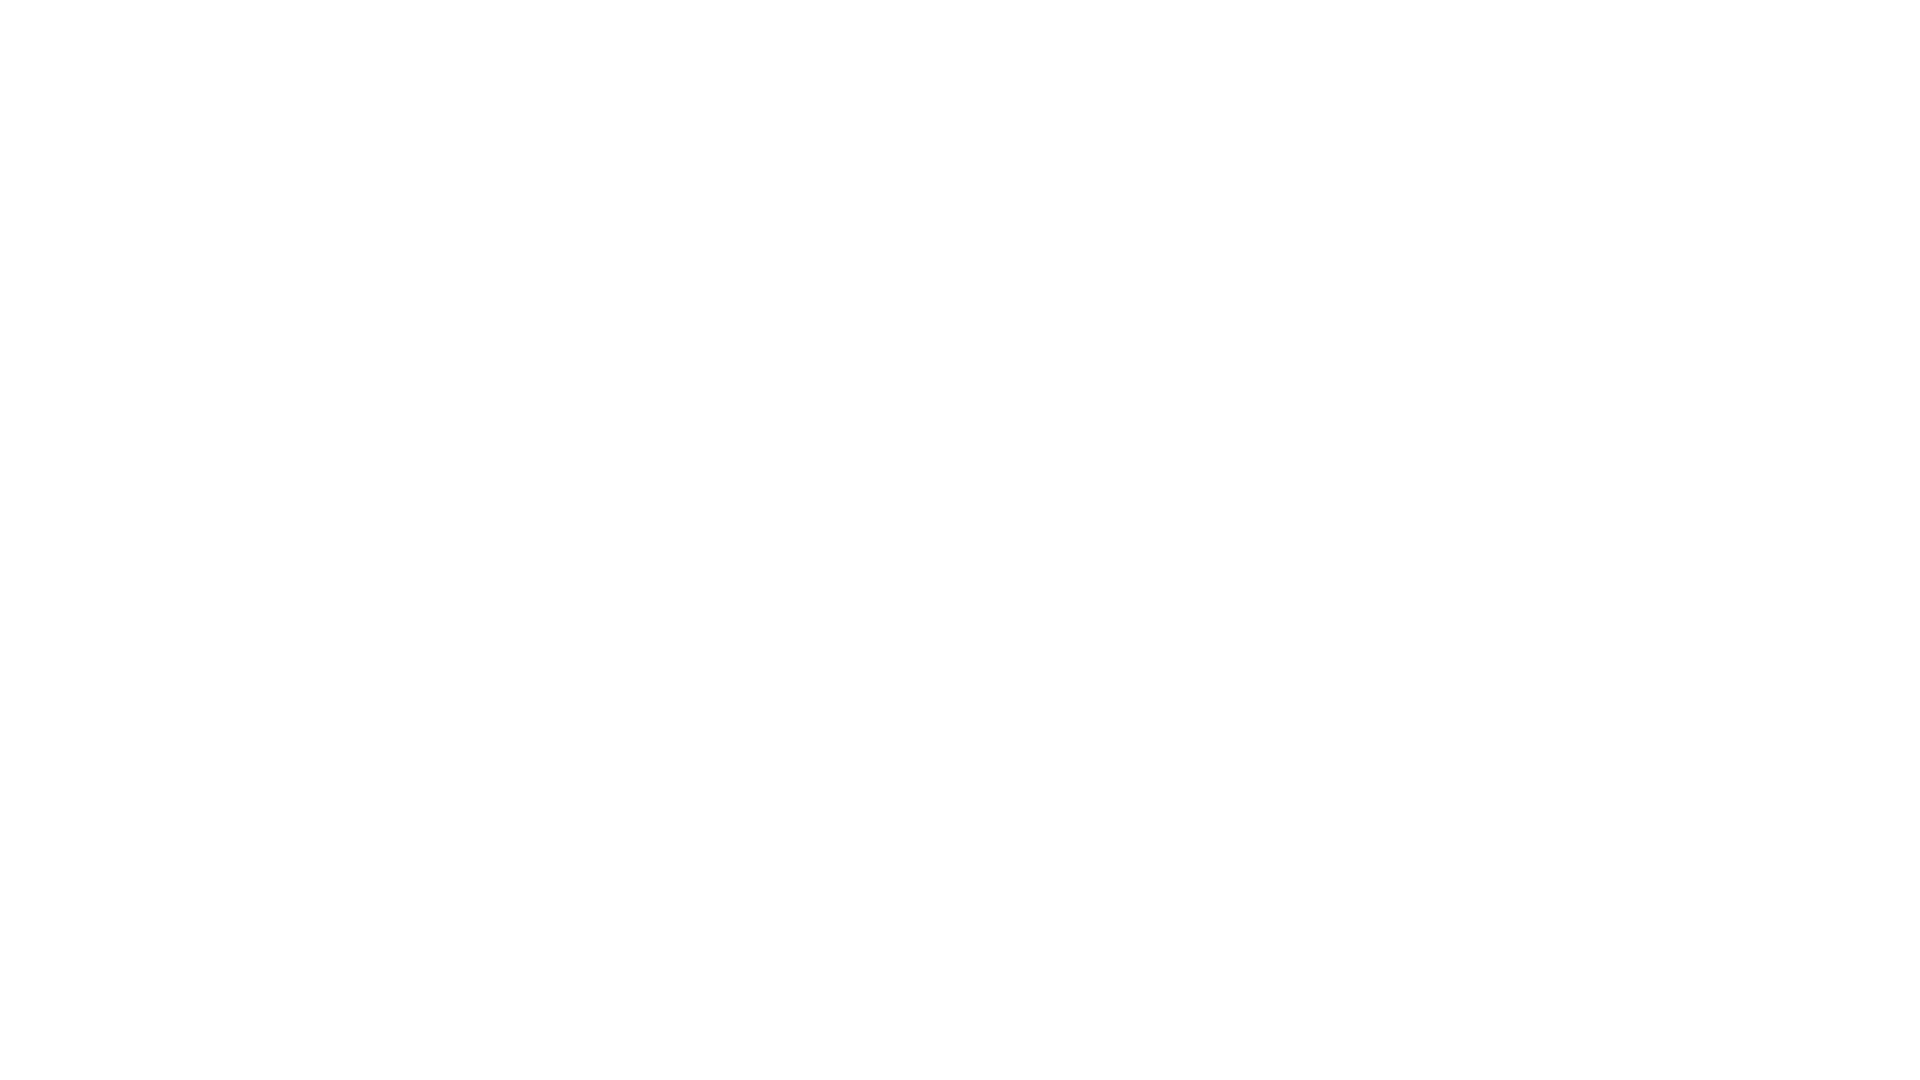

In [27]:
print(soup.prettify())

In [28]:
soup.find_all('h1')[0].text

'List of companies in India'

In [29]:
for i in soup.find_all('h2'):
    print(i.text.strip())

TCS
Accenture
Cognizant
ICICI Bank
HDFC Bank
Wipro
Infosys
Capgemini
Tech Mahindra
Genpact
HCLTech
Amazon
Axis Bank
Concentrix Corpo...
IBM
Reliance jio
Larsen & Toubro ...
HDB Financial Se...
Vodafone Idea
Teleperformance
Reliance Retail
Kotak Mahindra B...
Deloitte
Reliance Industr...
Bharti Airtel
BYJU'S
Tata Motors
Flipkart
WNS
Mahindra & Mahin...


In [30]:
soup.find_all('p',class_='rating')

[<p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.9
 								</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 									4.1
 								</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.9
 								</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 									4.0
 								</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 									4.0
 								</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.9
 								</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.9
 								</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.9
 								</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.7
 								</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 									4.0
 								

In [31]:
company=soup.find_all('div',class_='company-content-wrapper')

In [32]:
name=[]
rating=[]
reviews=[]
ctype=[]
hq=[]
how_old=[]
no_of_employee=[]

for i in company:

  name.append(i.find('h2').text.strip())
  rating.append(i.find('p',class_='rating').text.strip())
  reviews.append(i.find('a' , class_='review-count').text.strip())
  ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
  hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
  how_old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
  no_of_employee.append(i.find_all('p',class_='infoEntity')[3].text.strip())

df=pd.DataFrame({'name':name,
   'rating':rating,
   'reviews':reviews,
   'company_type':ctype,
   'Head_Quarters':hq,
   'Company_Age':how_old,
   'No_of_Employee':no_of_employee,
   })
  

In [33]:
name

['TCS',
 'Accenture',
 'Cognizant',
 'ICICI Bank',
 'HDFC Bank',
 'Wipro',
 'Infosys',
 'Capgemini',
 'Tech Mahindra',
 'Genpact',
 'HCLTech',
 'Amazon',
 'Axis Bank',
 'Concentrix Corpo...',
 'IBM',
 'Reliance jio',
 'Larsen & Toubro ...',
 'HDB Financial Se...',
 'Vodafone Idea',
 'Teleperformance',
 'Reliance Retail',
 'Kotak Mahindra B...',
 'Deloitte',
 'Reliance Industr...',
 'Bharti Airtel',
 "BYJU'S",
 'Tata Motors',
 'Flipkart',
 'WNS',
 'Mahindra & Mahin...']

In [34]:
rating

['3.9',
 '4.1',
 '3.9',
 '4.0',
 '4.0',
 '3.9',
 '3.9',
 '3.9',
 '3.7',
 '4.0',
 '3.8',
 '4.3',
 '3.9',
 '4.0',
 '4.2',
 '4.0',
 '4.1',
 '4.0',
 '4.2',
 '3.6',
 '4.1',
 '3.9',
 '4.1',
 '4.1',
 '4.1',
 '3.5',
 '4.1',
 '4.2',
 '3.7',
 '3.9']